<a href="https://colab.research.google.com/github/Atharvamu/aipal-industrial-dqn/blob/main/dqn_sb3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DQN and Double DQN

Stable-Baselines3: https://github.com/DLR-RM/stable-baselines3

Documentation: https://stable-baselines.readthedocs.io/en/master/


Double Q-Learning: https://paperswithcode.com/method/double-q-learning



## Installation

We will install master version of SB3.

In [1]:
!pip install git+https://github.com/Atharvamu/aipal-industrial-dqn.git

  Cloning https://github.com/Atharvamu/aipal-industrial-dqn.git to /tmp/pip-req-build-bngraxr1
  Running command git clone --filter=blob:none --quiet https://github.com/Atharvamu/aipal-industrial-dqn.git /tmp/pip-req-build-bngraxr1
  Resolved https://github.com/Atharvamu/aipal-industrial-dqn.git to commit e0f213e9d7ce94f3c6c056d091658df05a77dff3
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 184.5/184.5 kB 7.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 117.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24

Import DQN and evaluation helper

## üè≠ Industrial Automation Environment

In this environment, the agent is responsible for maintaining a simulated industrial production system. The goal is to maximize product quality and machine health over time by tuning control parameters and scheduling maintenance effectively.








 Observation Space
Type: Box(5,)
Each observation is a vector of 5 continuous values:

| Num | Observation            | Min | Max |
| --- | ---------------------- | --- | --- |
| 0   | Machine Health         | 0.0 | 1.0 |
| 1   | Product Quality        | 0.0 | 1.0 |
| 2   | Time Since Maintenance | 0.0 | 1.0 |
| 3   | Control Parameter 1    | 0.0 | 1.0 |
| 4   | Control Parameter 2    | 0.0 | 1.0 |

üéÆ Action Space
Type: Discrete(6)

| Num | Action                  |
| --- | ----------------------- |
| 0   | No Operation            |
| 1   | Increase Control Param1 |
| 2   | Decrease Control Param1 |
| 3   | Increase Control Param2 |
| 4   | Decrease Control Param2 |
| 5   | Perform Maintenance     |


üéØ Reward
Reward is designed to encourage:


*   High product quality
*   Stable machine health
*   Well-timed maintenance scheduling


Bonuses are awarded for:


*   Timely and effective maintenance



Penalties are applied for:


*   Maintenance that is too early or too late
*   Low product quality or machine failure



üîí Note: Rewards are clipped to the range [-1.0, 1.0] to improve training stability.

üìà Optimal Control Shaping:

Product quality is also influenced by how close the control parameters are to ideal values.This simulates a realistic manufacturing setting where certain parameter combinations yield optimal performance. A Gaussian function boosts quality when:

*   Param1 is near 0.7
*   Param2 is near 0.3


üö¶ Starting State


*   Machine Health:
Drawn from a normal distribution ~ùìù(0.9, 0.05), then clipped to the range [0.7, 1.0].
*   Product Quality:
Sampled uniformly from the range [0.4, 0.7].

*   Time Since Maintenance:

      70% chance of starting at 0.0

      30% chance of a value sampled uniformly from [0.1, 0.3]
*   Control Parameters 1 & 2:
Sampled uniformly from the range [0.4, 0.6]





‚õî Episode Termination(The episode terminates when any of the following conditions are met):


*   Machine Health drops to 0.0 (system failure)
*   Product Quality falls below 0.4 (product defect)

*   Maximum of 300 steps is reached (timeout)













In [2]:
from aipal_industrial_dqn.industrial_env import IndustrialAutomationEnv
from stable_baselines3 import DQN
from stable_baselines3.common.callbacks import EvalCallback, CheckpointCallback
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.dqn.policies import DQNPolicy
import gymnasium as gym
from gymnasium import spaces
import torch as th
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import os

## TESTING AND PLOTTING CLASS

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from aipal_industrial_dqn.industrial_env import IndustrialAutomationEnv
from stable_baselines3 import DQN

class EvaluationPlotter:
    def __init__(self, model_path, reward_episodes=100, maint_episodes=100): #100 episodes for reward and 100 for maintenance
        self.model = DQN.load(model_path)
        self.reward_episodes = reward_episodes
        self.maint_episodes = maint_episodes

    def plot_rewards(self):
        episode_returns = []

        for _ in range(self.reward_episodes):
            env = IndustrialAutomationEnv()
            obs, _ = env.reset()
            done = False
            total_reward = 0

            while not done:
                action, _ = self.model.predict(obs, deterministic=True)
                obs, reward, terminated, truncated, _ = env.step(action)
                total_reward += reward
                done = terminated or truncated

            episode_returns.append(total_reward)

        avg_return = np.mean(episode_returns)
        min_idx = np.argmin(episode_returns)
        max_idx = np.argmax(episode_returns)

        plt.figure(figsize=(12, 5))
        plt.plot(range(1, len(episode_returns) + 1), episode_returns,
                 marker='o', linestyle='-', color='dodgerblue', label='Episode Return')
        plt.axhline(avg_return, color='red', linestyle='--', label=f'Average Return: {avg_return:.2f}')

        plt.annotate(f"Min: {episode_returns[min_idx]:.2f}",
                     xy=(min_idx + 1, episode_returns[min_idx]),
                     xytext=(min_idx + 1, episode_returns[min_idx] - 15),
                     arrowprops=dict(arrowstyle="->", color='red'))

        plt.annotate(f"Max: {episode_returns[max_idx]:.2f}",
                     xy=(max_idx + 1, episode_returns[max_idx]),
                     xytext=(max_idx + 1, episode_returns[max_idx] + 10),
                     arrowprops=dict(arrowstyle="->", color='green'))

        plt.title("Total Reward per Episode")
        plt.xlabel("Episode")
        plt.ylabel("Total Reward")
        plt.xticks(np.arange(1, len(episode_returns) + 1, 5))
        plt.legend()
        plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
        plt.tight_layout()
        plt.show()

    def plot_maintenance(self):
        maintenance_counts = []

        for _ in range(self.maint_episodes):
            env = IndustrialAutomationEnv()
            obs, _ = env.reset()
            done = False
            maint_count = 0

            while not done:
                action, _ = self.model.predict(obs, deterministic=True)
                if action == 5:
                    maint_count += 1
                obs, _, terminated, truncated, _ = env.step(action)
                done = terminated or truncated

            maintenance_counts.append(maint_count)

        avg_maint = np.mean(maintenance_counts)
        min_idx = np.argmin(maintenance_counts)
        max_idx = np.argmax(maintenance_counts)

        plt.figure(figsize=(12, 5))
        plt.plot(range(1, len(maintenance_counts) + 1), maintenance_counts,
                 marker='s', color='darkorange', label="Maintenance Count")
        plt.axhline(avg_maint, color='gray', linestyle='--', label=f'Avg: {avg_maint:.2f}')

        plt.annotate(f"Min: {maintenance_counts[min_idx]}",
                     xy=(min_idx + 1, maintenance_counts[min_idx]),
                     xytext=(min_idx + 1, maintenance_counts[min_idx] + 2),
                     arrowprops=dict(arrowstyle="->", color='green'))

        plt.annotate(f"Max: {maintenance_counts[max_idx]}",
                     xy=(max_idx + 1, maintenance_counts[max_idx]),
                     xytext=(max_idx + 1, maintenance_counts[max_idx] + 2),
                     arrowprops=dict(arrowstyle="->", color='red'))

        plt.title("Maintenance Actions per Episode")
        plt.xlabel("Episode")
        plt.ylabel("Number of Maintenance Actions")
        plt.xticks(np.arange(1, len(maintenance_counts) + 1, 5))
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()
        plt.tight_layout()
        plt.show()


##PART 1 - DQN

In [3]:
# Initialize and validate env
env = IndustrialAutomationEnv()
check_env(env)

In [4]:
# Train DQN
model = DQN(
    "MlpPolicy",
    env,
    verbose=1,
    learning_rate=1e-3,
    buffer_size=10000,
    learning_starts=1000,
    batch_size=32,
    tau=0.005, # Soft update parameter; otherwise results are worse
    gamma=0.99,
    train_freq=4,
    #target_update_interval=10,
    exploration_fraction=0.1,
    exploration_final_eps=0.02,
    tensorboard_log="./dqn_tensorboard/"
)

model.learn(total_timesteps=100_000)
model.save("dqn_industrial_env")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./dqn_tensorboard/DQN_1
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 300      |
|    ep_rew_mean      | 107      |
|    exploration_rate | 0.882    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3579     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1200     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.00413  |
|    n_updates        | 49       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 300      |
|    ep_rew_mean      | 111      |
|    exploration_rate | 0.765    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1384     |
|    time_elapsed     | 1        |
|    total_timesteps  | 2400   

Episode 1 completed


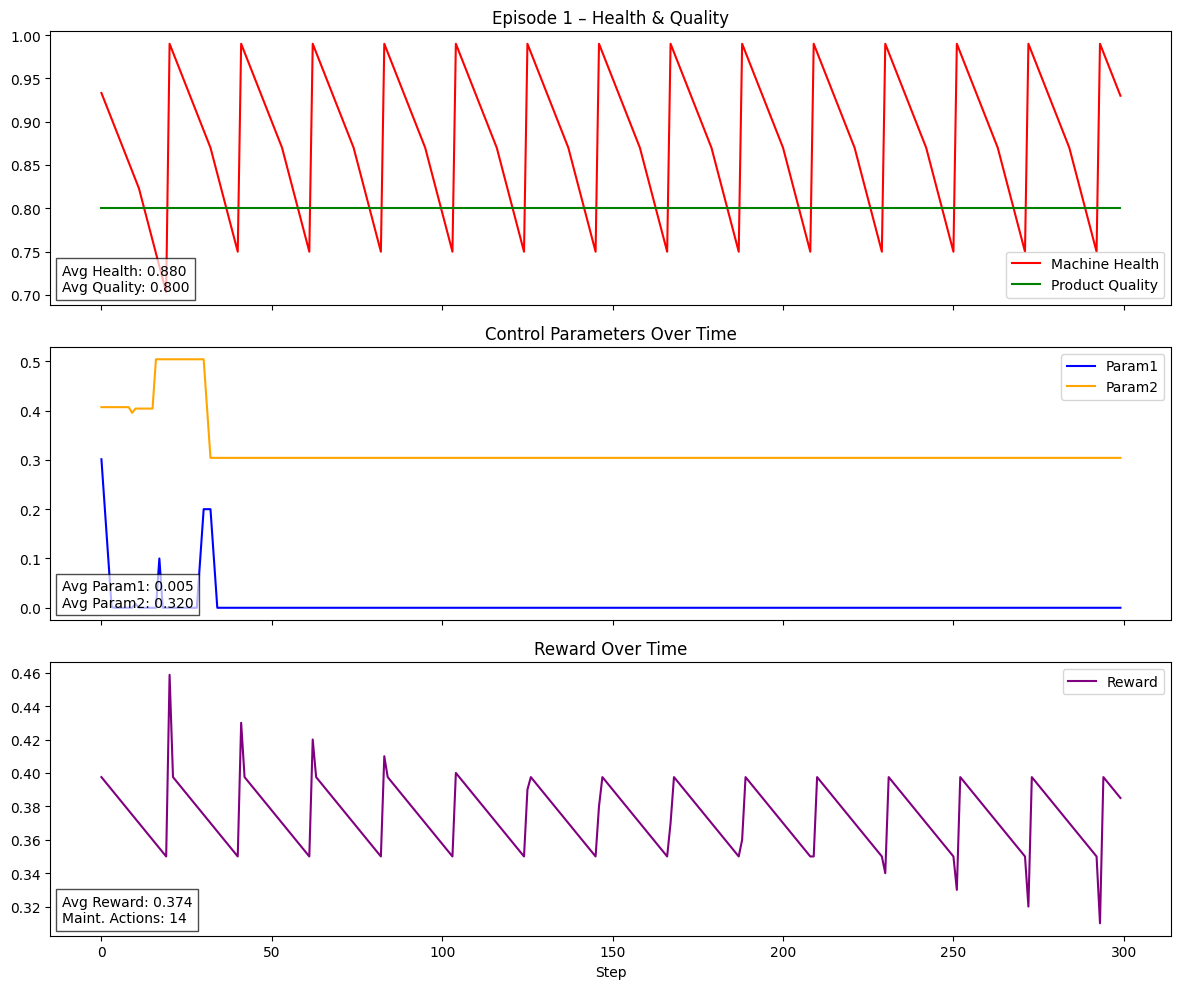

Episode 2 completed


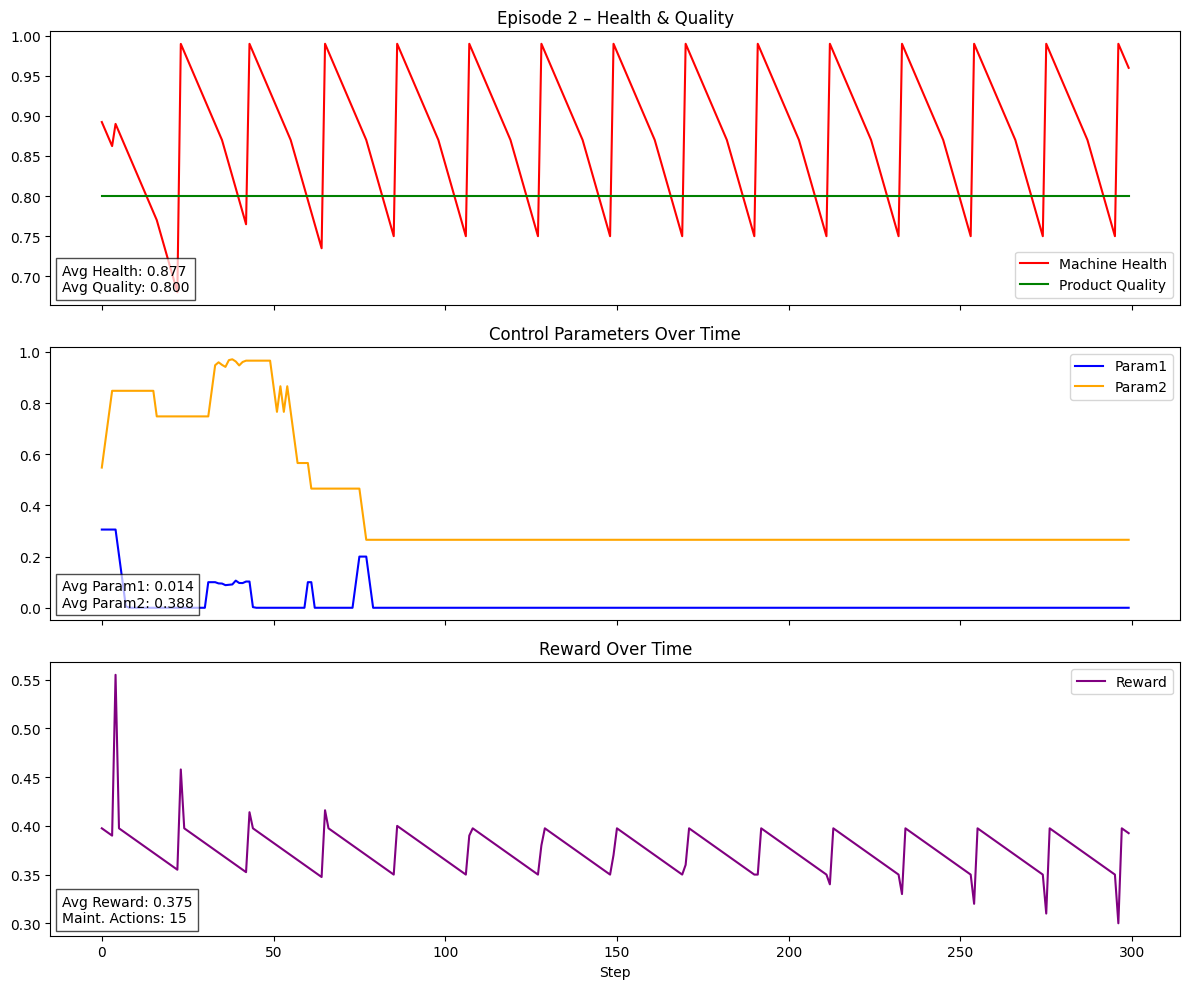

Episode 3 completed


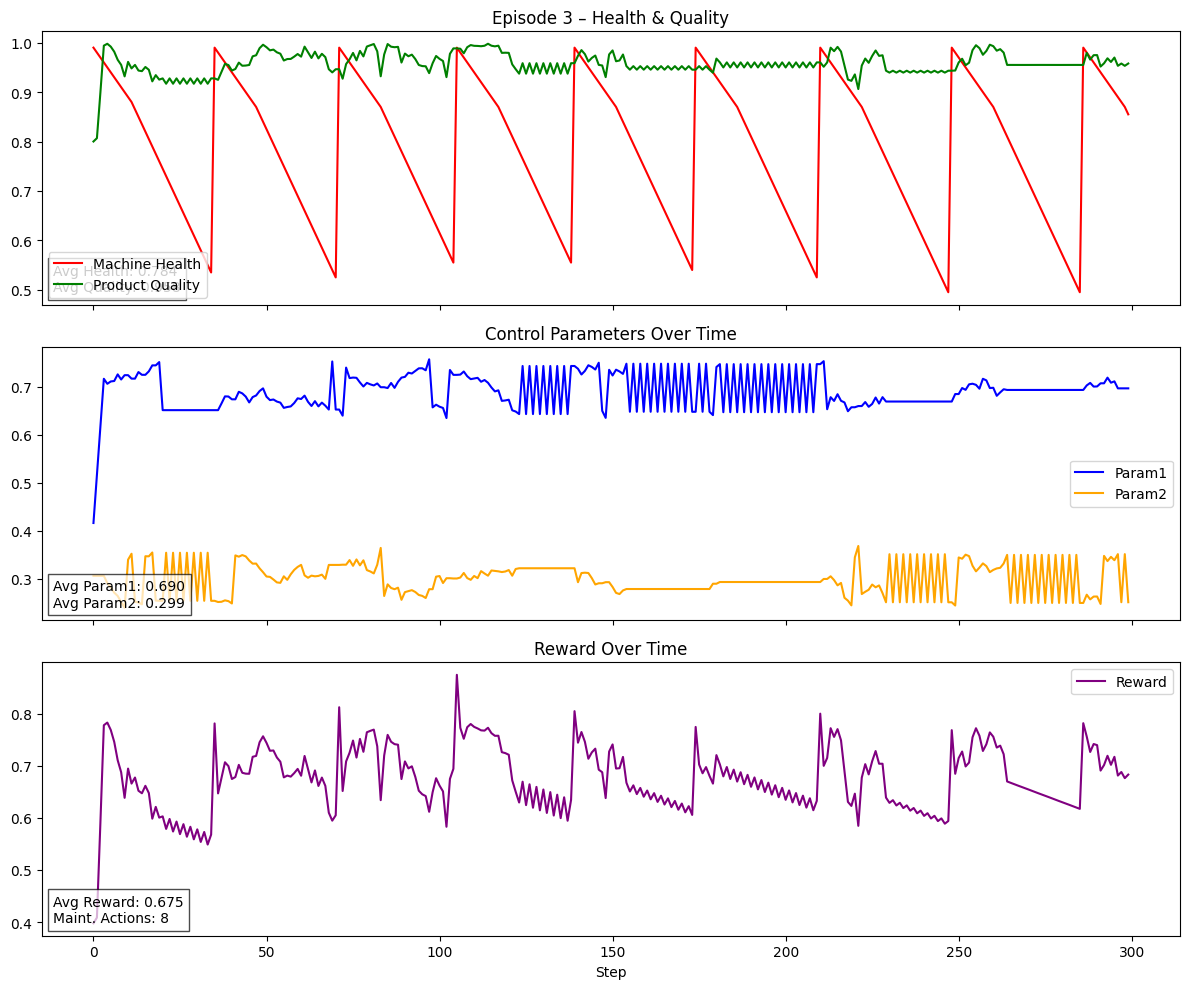

Episode 4 completed


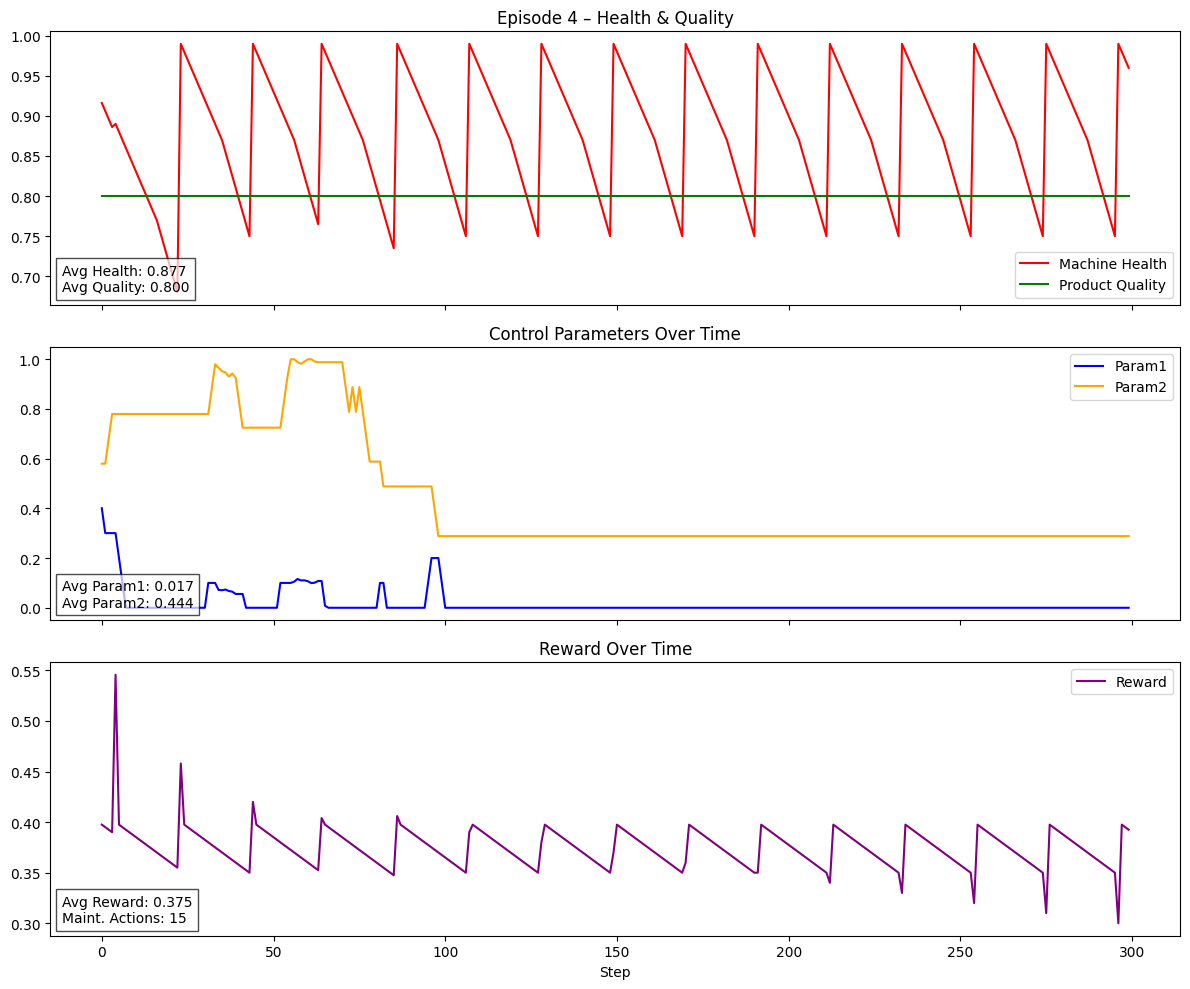

Episode 5 completed


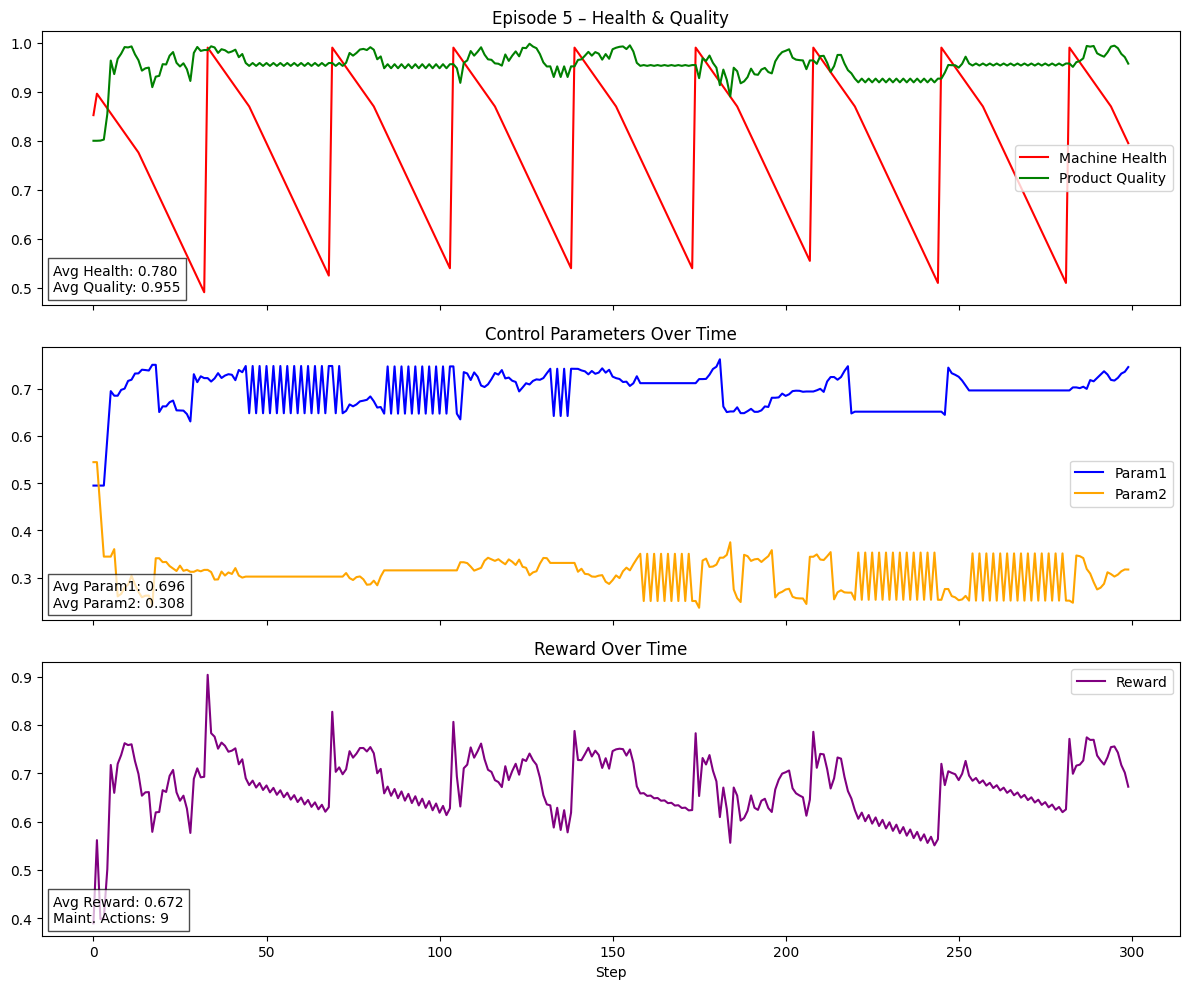

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_metrics(metrics, title, maintenance_count=None):
    steps = range(len(metrics['rewards']))

    # Calculate averages
    avg_health = np.mean(metrics['healths'])
    avg_quality = np.mean(metrics['qualities'])
    avg_param1 = np.mean(metrics['param1s'])
    avg_param2 = np.mean(metrics['param2s'])
    avg_reward = np.mean(metrics['rewards'])

    fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

    # Plot 1: Health & Quality
    axs[0].plot(steps, metrics['healths'], label="Machine Health", color='red')
    axs[0].plot(steps, metrics['qualities'], label="Product Quality", color='green')
    axs[0].set_title(f"{title} ‚Äì Health & Quality")
    axs[0].legend()
    axs[0].text(0.01, 0.05,
        f"Avg Health: {avg_health:.3f}\nAvg Quality: {avg_quality:.3f}",
        transform=axs[0].transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

    # Plot 2: Control Parameters
    axs[1].plot(steps, metrics['param1s'], label="Param1", color='blue')
    axs[1].plot(steps, metrics['param2s'], label="Param2", color='orange')
    axs[1].set_title("Control Parameters Over Time")
    axs[1].legend()
    axs[1].text(0.01, 0.05,
        f"Avg Param1: {avg_param1:.3f}\nAvg Param2: {avg_param2:.3f}",
        transform=axs[1].transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

    # Plot 3: Reward
    axs[2].plot(steps, metrics['rewards'], label="Reward", color='purple')
    axs[2].set_title("Reward Over Time")
    axs[2].legend()
    reward_text = f"Avg Reward: {avg_reward:.3f}"
    if maintenance_count is not None:
        reward_text += f"\nMaint. Actions: {maintenance_count}"
    axs[2].text(0.01, 0.05, reward_text,
        transform=axs[2].transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

    plt.xlabel("Step")
    plt.tight_layout()
    plt.show()


# Evaluate 5 episodes
for ep in range(5):
    env = IndustrialAutomationEnv()
    obs, _ = env.reset()
    done = False
    maintenance_count = 0

    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, _, terminated, truncated, _ = env.step(action)
        if action == 5:
            maintenance_count += 1
        done = terminated or truncated

    print(f"Episode {ep + 1} completed")
    plot_metrics(env.metrics, f"Episode {ep + 1}", maintenance_count=maintenance_count)


Now that we've trained our DQN agent, it's time to analyze their behavior.

We'll use two metrics:
- **Total Reward**: How much cumulative reward the agent earned in an episode.
- **Maintenance Count**: How often the agent chose to perform maintenance (Action 5).



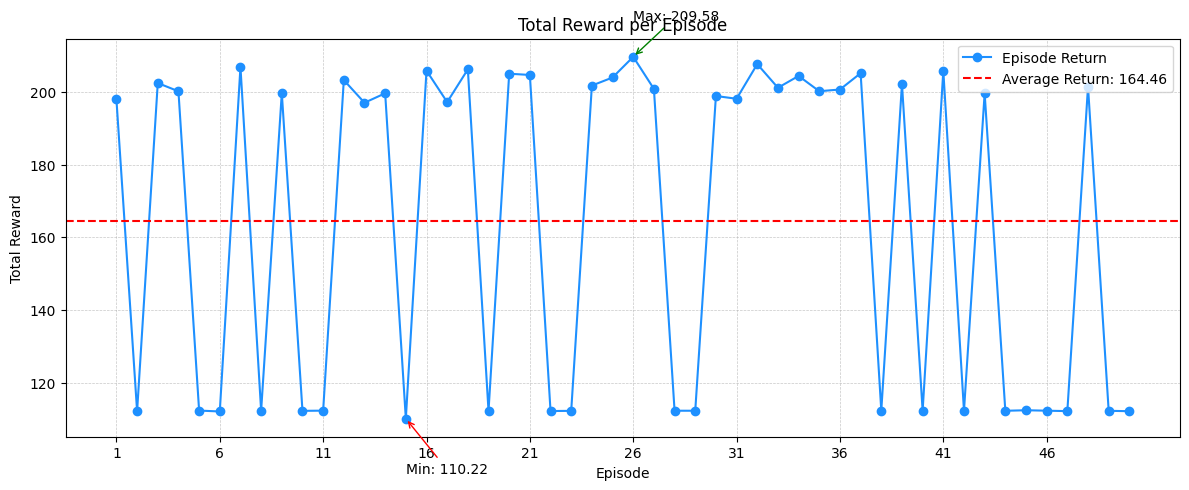

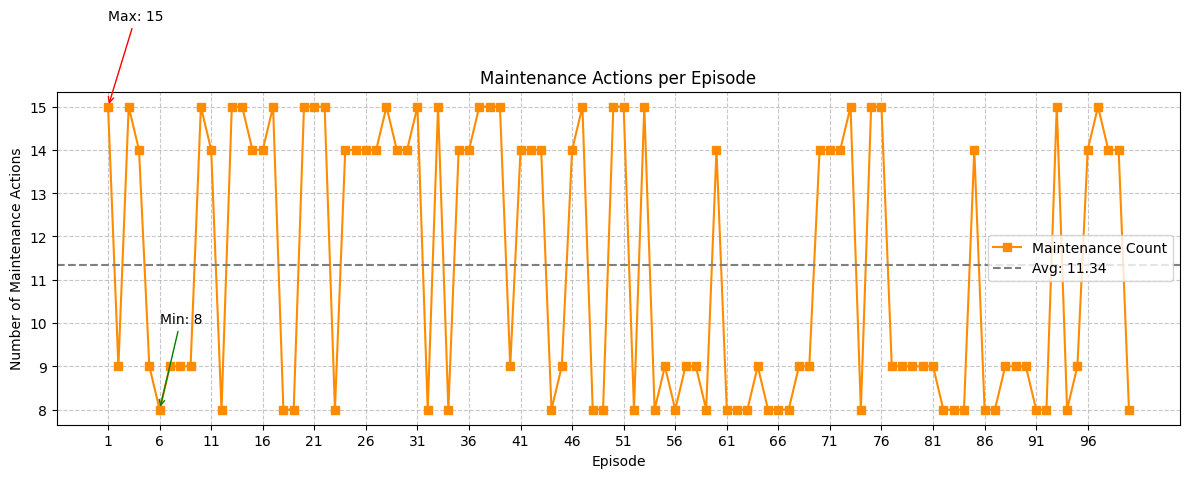

In [33]:
dqn_plotter = EvaluationPlotter("dqn_industrial_env")
dqn_plotter.plot_rewards()
dqn_plotter.plot_maintenance()

## üîç Interpreting DQN Performance: Are We Missing Something?

In the previous plot, we saw that the DQN agent achieves a fairly consistent and decent total reward across episodes.

However, reward alone doesn't tell the whole story.

Let‚Äôs now investigate how well the agent tuned the control parameters ‚Äî param1 and param2 ‚Äî during those episodes.

Even if the reward is acceptable, the agent might be using suboptimal combinations of control settings that don't align with the known ideal values (param1 = 0.7, param2 = 0.3).

This could indicate that the agent is succeeding by luck or brute-force compensation, rather than learning a genuinely optimal control strategy.

## üß≠ Why Try Double DQN (DDQN)?

While DQN learned to preserve machine health and product quality, it may have relied on inconsistent or inefficient parameter tuning ‚Äî especially if param1 and param2 tend to drift or collapse.

This often happens because DQN tends to overestimate Q-values, which can lead to unstable or biased policies.

In the next section, we'll switch to Double DQN (DDQN), which uses two Q-networks to separate action selection from target evaluation ‚Äî reducing overestimation and encouraging more accurate and stable control parameter tuning.

## Exercise (30 minutes): Double DQN

In DQN, the same network is responsible for selecting and estimating the best next action (in the TD-target) and that may lead to over-estimation (the action which q-value is over-estimated will be chosen more often and this slow down training). Over time, this bias slows down learning and may lock the agent into repetitive or overly cautious behavior (e.g., excessive maintenance).

To reduce over-estimation, double q-learning (and then double DQN) was proposed. It decouples the action selection from the value estimation.This is done by using two Q-networks:

Evaluation network (with parameters Œ∏): used to select the best next action

Target network (with parameters Œ∏‚Ä≤): used to evaluate the value of that action

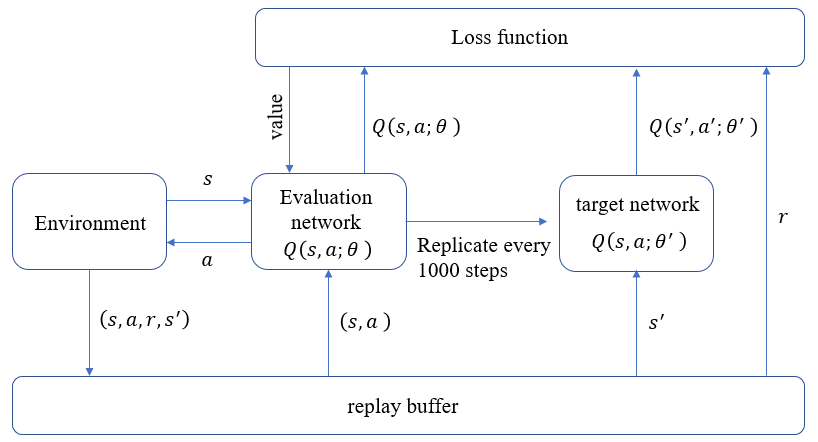

Environment generates transitions (s, a, r, s‚Ä≤) which go into the Replay Buffer

The Evaluation Network (Q(s, a; Œ∏)) selects actions and is updated frequently

The Target Network (Q(s, a; Œ∏‚Ä≤)) is updated less frequently (e.g., every 1000 steps) and used for stable target Q-value computation

Both networks are used in calculating the loss and improving the Evaluation Network through backpropagation

Link: https://paperswithcode.com/method/double-q-learning

Paper: https://arxiv.org/abs/1509.06461



## 1.Custom Double DQN Class

In [8]:
from torch.nn import functional as F
from stable_baselines3.dqn.dqn import DQN

class DoubleDQN(DQN):
    def train(self, gradient_steps: int, batch_size: int = 100) -> None:
        self.policy.set_training_mode(True)
        self._update_learning_rate(self.policy.optimizer)
        losses = []

        for _ in range(gradient_steps):
            replay_data = self.replay_buffer.sample(batch_size, env=self._vec_normalize_env)

            # üîÅ DDQN Core: Action selection from q_net, value estimation from q_net_target
            with th.no_grad():
                q_values_online = self.q_net(replay_data.next_observations)
                next_actions_online = q_values_online.argmax(dim=1, keepdim=True)
                q_values_target = self.q_net_target(replay_data.next_observations)
                next_q_values = q_values_target.gather(1, next_actions_online)
                target_q_values = replay_data.rewards + (1 - replay_data.dones) * self.gamma * next_q_values

            # üîß Compute loss
            current_q_values = self.q_net(replay_data.observations)
            current_q_values = current_q_values.gather(1, replay_data.actions.long())
            loss = F.smooth_l1_loss(current_q_values, target_q_values)

            # ‚¨áÔ∏è Gradient update
            self.policy.optimizer.zero_grad()
            loss.backward()
            th.nn.utils.clip_grad_norm_(self.policy.parameters(), self.max_grad_norm)
            self.policy.optimizer.step()

            losses.append(loss.item())

            # Optional logging
            if self._n_updates % 100 == 0:
                self.logger.record("train/q_max", float(current_q_values.max()))
                self.logger.record("train/q_mean", float(current_q_values.mean()))
                self.logger.record("train/loss_hist", float(loss.item()))

        self._n_updates += gradient_steps
        self.logger.record("train/n_updates", self._n_updates, exclude="tensorboard")
        self.logger.record("train/loss", np.mean(losses))


##2. Policy & Environment Setup

In [9]:
# ‚úÖ Policy architecture config
from torch import nn
policy_kwargs = dict(
    net_arch=[128, 128],
    activation_fn=nn.ReLU
)

# ‚úÖ Create vectorized environment
from aipal_industrial_dqn.industrial_env import IndustrialAutomationEnv
from stable_baselines3.common.env_util import make_vec_env

env = make_vec_env(IndustrialAutomationEnv, n_envs=1)

##  3. Evaluation & Checkpoint Callbacks


In [10]:
# ‚úÖ Define evaluation and checkpoint callbacks
from stable_baselines3.common.callbacks import EvalCallback, CheckpointCallback

eval_env = IndustrialAutomationEnv()

eval_callback = EvalCallback(
    eval_env,
    best_model_save_path="./best_model_ddqn/",
    log_path="./logs_ddqn/",
    eval_freq=5000,
    deterministic=True,
    render=False
)

checkpoint_callback = CheckpointCallback(
    save_freq=10000,
    save_path="./checkpoints_ddqn/",
    name_prefix="ddqn_industrial"
)


##4. Model Initialization

In [11]:
model = DoubleDQN(
    policy=DQNPolicy,
    env=env,
    learning_rate=5e-4,
    buffer_size=20000,
    learning_starts=1000,
    batch_size=64,
    gamma=0.99,
    train_freq=4,
    target_update_interval=100,
    exploration_fraction=0.2,
    exploration_final_eps=0.05,
    tensorboard_log="./sb3_tensorboard_ddqn/",
    verbose=1,
    policy_kwargs=policy_kwargs
)

Using cpu device


##5. Train & Save Model


In [12]:
# ‚úÖ Train the Double DQN model
model.learn(
    total_timesteps=150_000,
    callback=[eval_callback, checkpoint_callback]
)

# ‚úÖ Save the model
model.save("sb3_ddqn_industrial_improved")
print("‚úÖ Improved DDQN training complete and model saved.")


Logging to ./sb3_tensorboard_ddqn/DQN_1
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 300      |
|    ep_rew_mean      | 106      |
|    exploration_rate | 0.962    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3720     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1200     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0223   |
|    loss_hist        | 0.111    |
|    n_updates        | 49       |
|    q_max            | 0.154    |
|    q_mean           | 0.0191   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 300      |
|    ep_rew_mean      | 107      |
|    exploration_rate | 0.924    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1707     |
|    time_elapsed     | 1        |
|    total_time

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5000, episode_reward=112.67 +/- 0.02
Episode length: 300.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 300      |
|    mean_reward      | 113      |
| rollout/            |          |
|    exploration_rate | 0.842    |
| time/               |          |
|    total_timesteps  | 5000     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.0456   |
|    n_updates        | 999      |
----------------------------------
New best mean reward!
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 300      |
|    ep_rew_mean      | 110      |
|    exploration_rate | 0.81     |
| time/               |          |
|    episodes         | 20       |
|    fps              | 1093     |
|    time_elapsed     | 5        |
|    total_timesteps  | 6000     |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss      

Now that we've trained our DDQN agent, it's time to analyze their behavior.

We'll use two metrics:
- **Total Reward**: How much cumulative reward the agent earned in an episode.
- **Maintenance Count**: How often the agent chose to perform maintenance (Action 5).


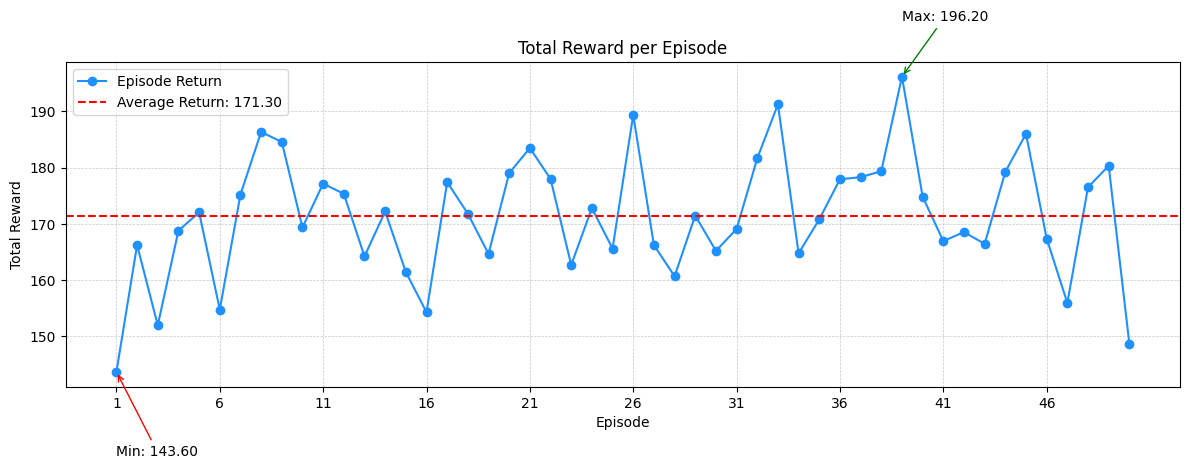

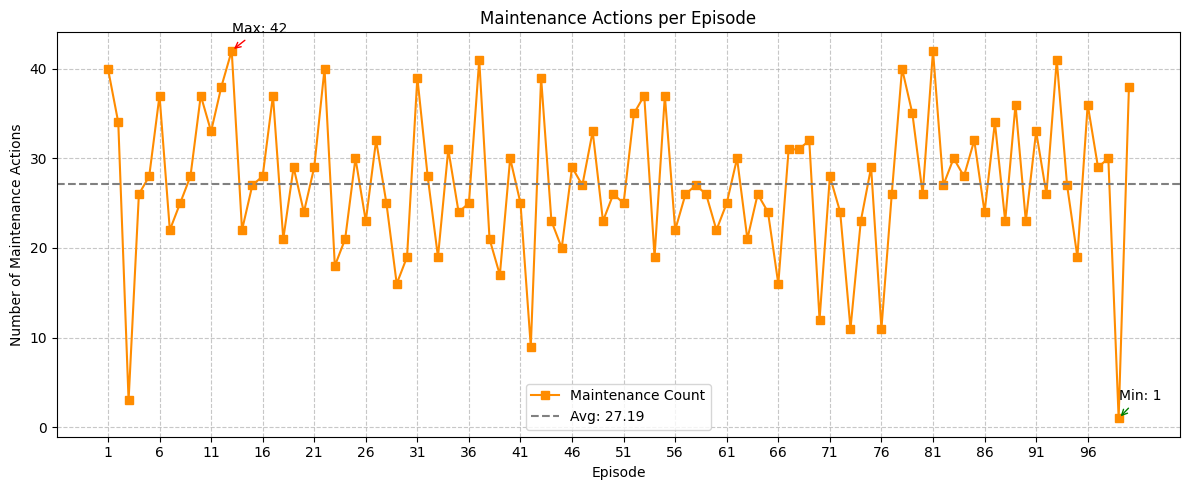

In [34]:
ddqn_plotter = EvaluationPlotter("sb3_ddqn_industrial_improved")
ddqn_plotter.plot_rewards()
ddqn_plotter.plot_maintenance()

###COMPARISON OF DQN AND DDQN


SB3 DQN

SB3 Double DQN


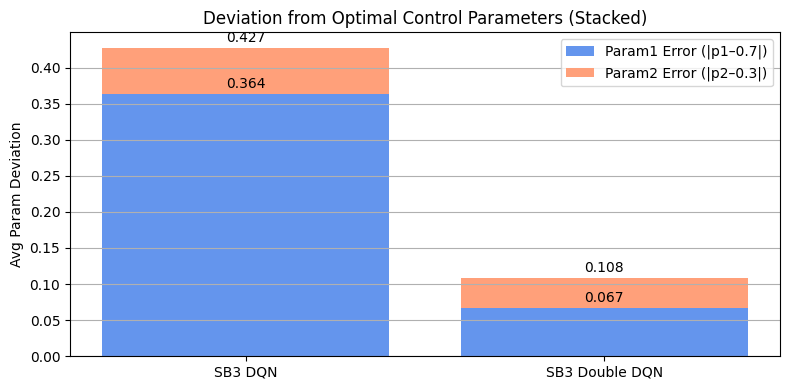

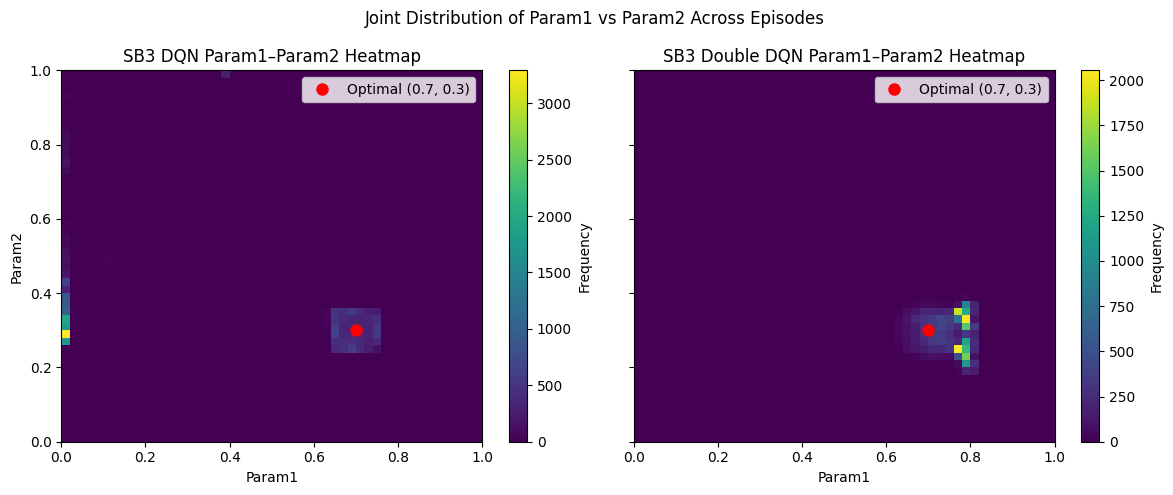

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from aipal_industrial_dqn.industrial_env import IndustrialAutomationEnv
from stable_baselines3 import DQN

# === CONFIG ===
episodes = 100
show_all_plots = False  # üîÅ Toggle this to True if you want full episode plots

# === Load Models ===
sb3_dqn = DQN.load("dqn_industrial_env")
sb3_ddqn = DQN.load("sb3_ddqn_industrial_improved")

# === Test Function ===
def run_test_episode(env, model):
    obs, _ = env.reset()
    done = False
    maintenance_count = 0

    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, _, terminated, truncated, _ = env.step(action)
        if action == 5:
            maintenance_count += 1
        done = terminated or truncated

    return env.metrics, maintenance_count

# === Run Evaluation ===
summary_stats = {}
agents = {
    "SB3 DQN": sb3_dqn,
    "SB3 Double DQN": sb3_ddqn,
}

# Collect param values across all episodes for heatmap
agent_param_data = {name: {"param1s": [], "param2s": []} for name in agents}

for name, model in agents.items():
    avg_rewards, avg_healths, avg_qualities, maint_counts = [], [], [], []
    param_errors, param1_errors, param2_errors = [], [], []

    print(f"\n{name}")
    for ep in range(episodes):
        env = IndustrialAutomationEnv()
        metrics, maint_count = run_test_episode(env, model)

        avg_rewards.append(np.mean(metrics["rewards"]))
        avg_healths.append(np.mean(metrics["healths"]))
        avg_qualities.append(np.mean(metrics["qualities"]))
        maint_counts.append(maint_count)

        # Collect for heatmap
        agent_param_data[name]["param1s"].extend(metrics["param1s"])
        agent_param_data[name]["param2s"].extend(metrics["param2s"])

        # Control parameter deviation from optimal
        param1s = np.array(metrics["param1s"])
        param2s = np.array(metrics["param2s"])
        param1_dev = np.mean(np.abs(param1s - 0.7))
        param2_dev = np.mean(np.abs(param2s - 0.3))
        total_deviation = param1_dev + param2_dev

        param1_errors.append(param1_dev)
        param2_errors.append(param2_dev)
        param_errors.append(total_deviation)

        if show_all_plots:
            steps = range(len(metrics['rewards']))
            fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
            fig.suptitle(f"{name} ‚Äì Episode {ep+1}")

            axs[0].plot(steps, metrics["healths"], label="Health", color="red")
            axs[0].plot(steps, metrics["qualities"], label="Quality", color="green")
            axs[0].set_ylabel("Health / Quality")
            axs[0].legend()

            axs[1].plot(steps, metrics["param1s"], label="Param1", color="blue")
            axs[1].plot(steps, metrics["param2s"], label="Param2", color="orange")
            axs[1].set_ylabel("Control Params")
            axs[1].legend()

            axs[2].plot(steps, metrics["rewards"], label="Reward", color="purple")
            axs[2].set_ylabel("Reward")
            axs[2].set_xlabel("Step")
            axs[2].legend()

            plt.tight_layout()
            plt.show()

    # Store stats
    summary_stats[name] = {
        "avg_reward": np.mean(avg_rewards),
        "avg_health": np.mean(avg_healths),
        "avg_quality": np.mean(avg_qualities),
        "avg_maintenance": np.mean(maint_counts),
        "avg_param_error": np.mean(param_errors),
        "param1_error": np.mean(param1_errors),
        "param2_error": np.mean(param2_errors),
    }

# === Stacked Summary Plot: Param1 vs Param2 Deviation ===
labels = list(summary_stats.keys())
x = np.arange(len(labels))

param1_vals = [summary_stats[k]["param1_error"] for k in labels]
param2_vals = [summary_stats[k]["param2_error"] for k in labels]

fig, ax = plt.subplots(figsize=(8, 4))
bar1 = ax.bar(x, param1_vals, label='Param1 Error (|p1‚Äì0.7|)', color='cornflowerblue')
bar2 = ax.bar(x, param2_vals, bottom=param1_vals, label='Param2 Error (|p2‚Äì0.3|)', color='lightsalmon')

ax.set_ylabel("Avg Param Deviation")
ax.set_title("Deviation from Optimal Control Parameters (Stacked)")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.bar_label(bar1, fmt="%.3f", padding=2)
ax.bar_label(bar2, fmt="%.3f", padding=2)
ax.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# === Heatmap: Param1 vs Param2 joint distribution ===
fig, axs = plt.subplots(1, len(agents), figsize=(12, 5), sharex=True, sharey=True)
if len(agents) == 1:
    axs = [axs]

for idx, (name, data) in enumerate(agent_param_data.items()):
    param1s = np.array(data["param1s"])
    param2s = np.array(data["param2s"])

    ax = axs[idx]
    h = ax.hist2d(param1s, param2s, bins=50, range=[[0, 1], [0, 1]], cmap='viridis')
    ax.plot(0.7, 0.3, 'ro', markersize=8, label='Optimal (0.7, 0.3)')
    ax.set_title(f"{name} Param1‚ÄìParam2 Heatmap")
    ax.set_xlabel("Param1")
    if idx == 0:
        ax.set_ylabel("Param2")
    ax.legend()

    # ‚úÖ Fix: colorbar attached per subplot
    fig.colorbar(h[3], ax=ax, label='Frequency')

plt.suptitle("Joint Distribution of Param1 vs Param2 Across Episodes")
plt.tight_layout()
plt.show()


##Analysis
 Analysis of Param1‚ÄìParam2 Heatmaps

üîµ SB3 DQN (Left Heatmap)

The distribution of control parameters under the SB3 DQN agent reveals** two distinct behavior patterns**:




*   There is a small concentration of values near the desired optimal region, indicating that the agent occasionally reaches the correct setting. However, this occurs inconsistently.
*   A significant portion of the param1 values cluster near 0.0, while param2 remains around 0.3. This suggests that the agent frequently reduces param1 excessively, resulting in a collapse to suboptimal control settings.




This behavior is characteristic of** DQN's overestimation bias**:

DQN tends to favor **immediate rewards, sometimes leading it to overcommit** to actions that appear temporarily beneficial.

As a result, it can get "stuck" in non-robust control strategies, failing to consistently reach or maintain the true optimal zone.





üü¢ SB3 Double DQN (Right Heatmap)

In contrast, the Double DQN agent shows a much **more stable and focused control behavior**:



*   The majority of the control values are concentrated near the ideal setting of param1 = 0.7 and param2 = 0.3.
*   This dense and consistent pattern suggests that the agent has not only learned the correct control strategy but also generalizes it across different episodes.




This behavior demonstrates one of the key benefits of Double DQN:

By **separating action selection and evaluation**, it reduces the overestimation problem seen in standard DQN.

This allows it to make more accurate long-term decisions, favoring parameter values that maximize both stability and reward.

